In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from IPython.display import display
from PIL import Image

PATH = '/content/drive/MyDrive/Documents/Colab Notebooks/PythonForFinance/'

Mounted at /content/drive


Monte Carlo simulations are for observing different possible reaslizations of a future event
- If your at the end of a tied basketball game, and a player shoots free throws, he either:
    - Scores
    - Misses
- At the end, we observe the final outcome
- But none of that tells you much about the player's chances of scoring
    - We can use past data to create a simulation - a new set of fictional but sensible data
        - Historical data > A larger data set with "fictional" data
        - This is a good proxy of different outcomes

To explore this concept, let's use the example of a company's revenue:
- Expected Revenues = Last Year Revenues * (1 + y-o-y growth rate)
    - Last year's revenues are already determined ie we have historical data for it
    - Year over year growth rate is variable (random variable)
- We can use software to run 1,000 simulations of different growth rates to get a minimum, maximum, and average expected revenue based on these different simulated growth rates
    - This would be useful for understanding the direction where revenues are going
- The two parameters, revenue growth rate and revenue volatility (std dev) can come from two places:
    - Historical data
    - User intuition


Cost of goods sold (Cogs)
Operating expenses (Opex)

If we wanted to predict both of these, we would need to model them as percentages of revenues and then run the simulations with the differing growth rates

Revenues - Cogs = Gross Profit

Gross Profit - Opex = Operating Profit

Prior to predicting a firm's future gross profit, you need expected revenue and expected COGS. We'll start by performing 1,000 simulations of the company's expected revenues

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# to simplify things, we're going to work in the scale of millions, so 170 = 170,000,000
revenue_mean = 170 # this represents the previous year's avg revenue
revenue_stdev = 20
iterations = 1000

In [13]:
revenue = np.random.normal(revenue_mean, revenue_stdev, iterations)
revenue

array([161.57214813, 169.36060049, 168.40300233, 138.64740459,
       199.2798717 , 142.78862211, 147.50118545, 185.3230288 ,
       153.13247227, 156.76865089, 201.66882722, 137.8811703 ,
       158.17303582, 164.51086116, 172.17345653, 162.72254427,
       163.23707945, 165.32547806, 161.1752572 , 141.93979364,
       112.44082947, 179.80808438, 171.43029425, 188.68890861,
       175.72669469, 190.20633704, 191.03946014, 180.93470806,
       149.80509383, 160.63576756, 155.15754349, 134.07034079,
       193.99799262, 168.42955503, 179.56955865, 170.58323317,
       175.92948342, 182.4895635 , 137.88907779, 175.24540457,
       149.38533995, 166.35346944, 132.70465941, 183.57788623,
       196.25461559, 132.9857478 , 190.24292553, 179.04576253,
       197.17197346, 127.70195756, 195.75546897, 184.33298806,
       136.28503459, 129.52306929, 206.47608563, 165.78909307,
       167.87691517, 185.12424521, 164.14489477, 186.56355884,
       159.25770719, 218.01926901, 156.49146981, 193.79

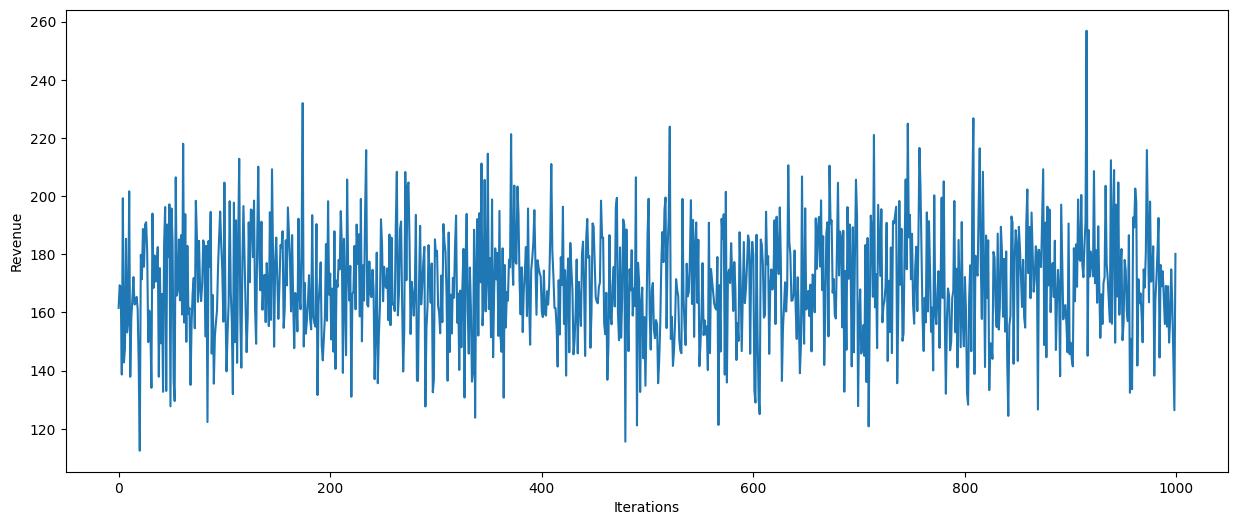

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(revenue)
plt.xlabel('Iterations')
plt.ylabel('Revenue')
plt.show()

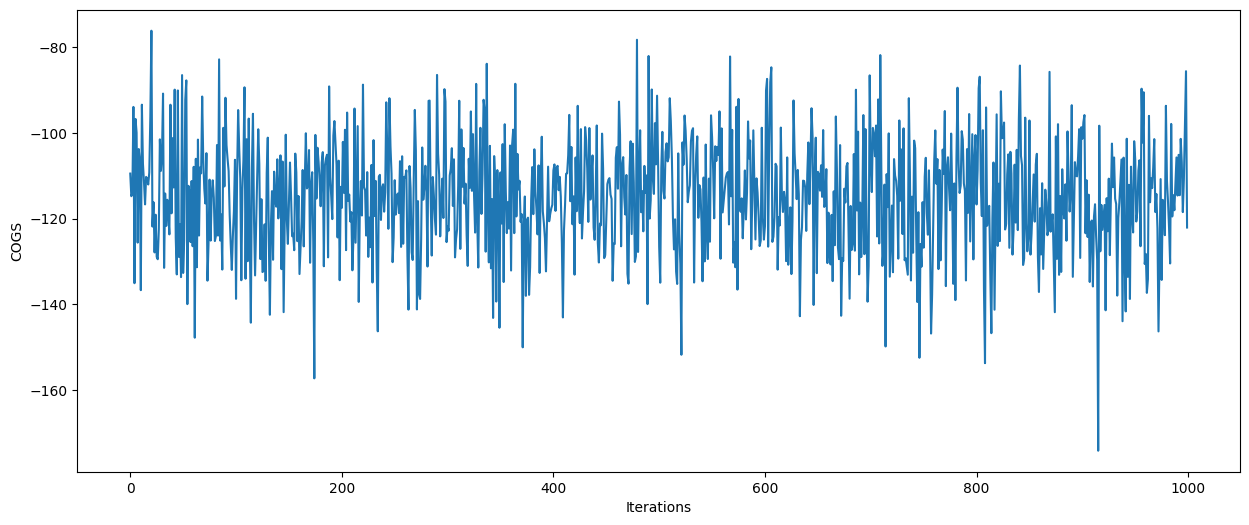

In [15]:
COGS = - (revenue * np.random.normal(0.6, 0.1)) # Say you were familiar enough with the company to know COGS are usully ~ 60% revenue with a stdev of 10%, also COGS is spent so '-'
plt.figure(figsize=(15, 6))
plt.plot(COGS)
plt.xlabel('Iterations')
plt.ylabel('COGS')
plt.show()

In [16]:
COGS.mean()

np.float64(-115.02323486503994)

In [17]:
COGS.std()

np.float64(13.244246144149821)

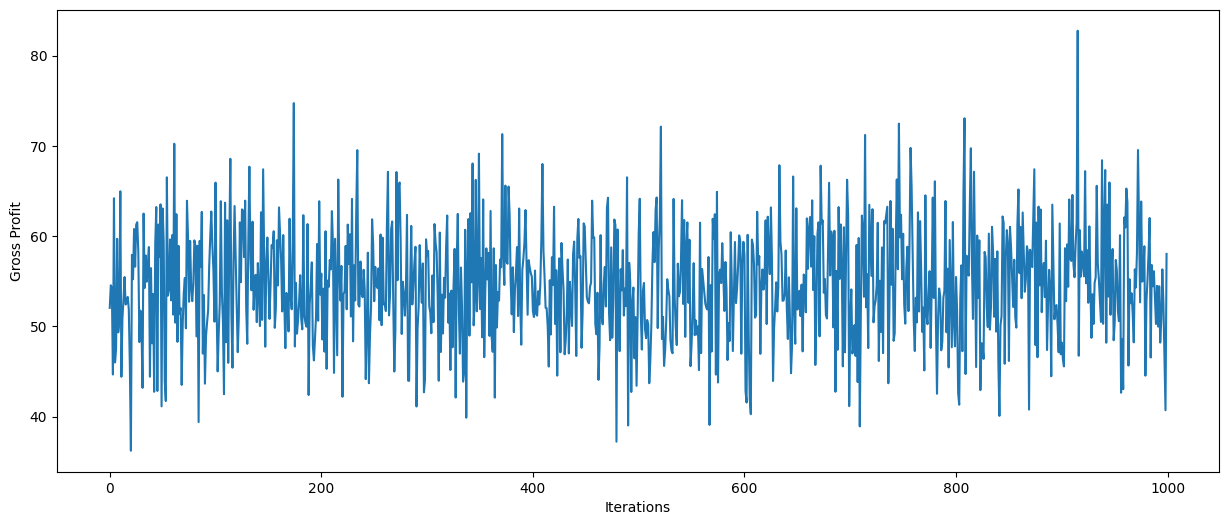

In [18]:
gross_profit = revenue + COGS
plt.figure(figsize=(15, 6))
plt.plot(gross_profit)
plt.xlabel('Iterations')
plt.ylabel('Gross Profit')
plt.show()

In [19]:
max(gross_profit)

np.float64(82.76942343417537)

In [20]:
min(gross_profit)

np.float64(36.22722685721729)

In [21]:
gross_profit.mean()

np.float64(54.67492258997566)

In [22]:
gross_profit.std()

np.float64(6.295494415051145)

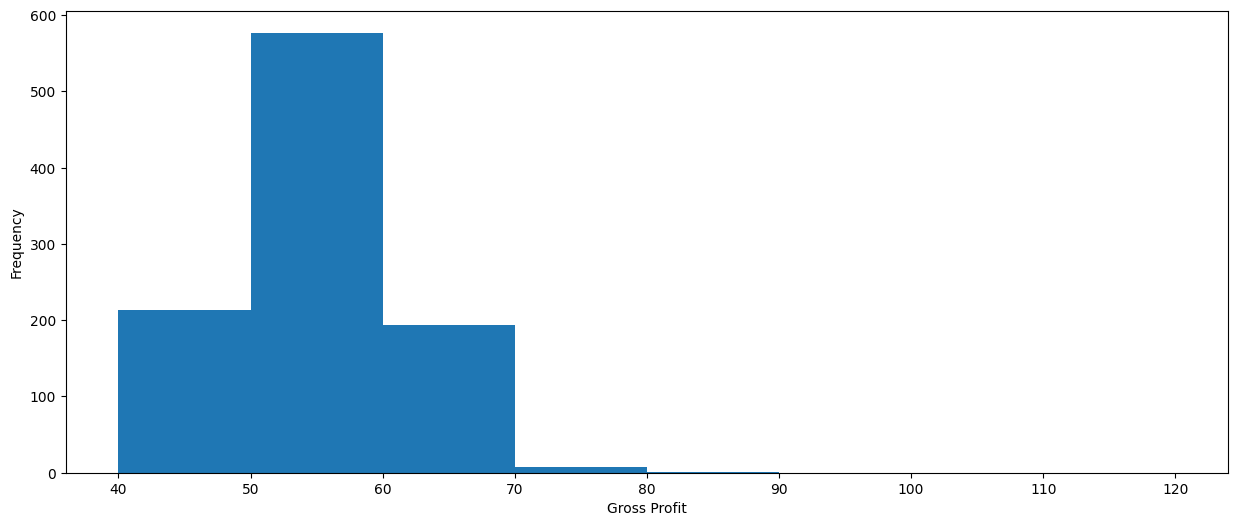

In [23]:
plt.figure(figsize=(15, 6))
plt.hist(gross_profit, bins=[40, 50, 60, 70, 80, 90, 100, 110, 120]) # By using a list, we will see bins located according to the values in the list
plt.xlabel('Gross Profit')
plt.ylabel('Frequency')
plt.show()

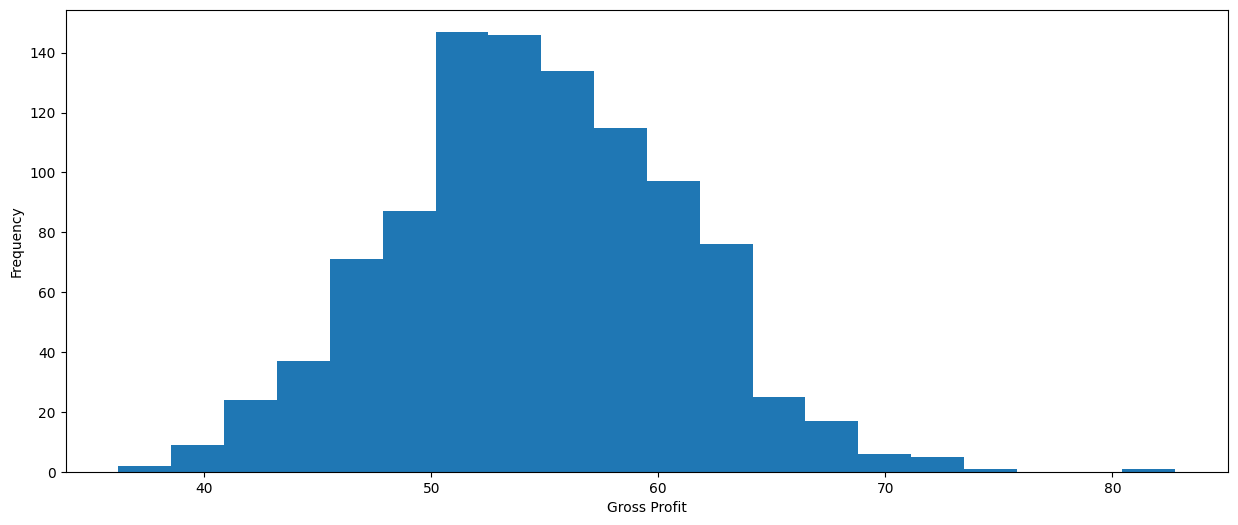

In [24]:
plt.figure(figsize=(15, 6))
plt.hist(gross_profit, bins=20) # By using a single value, we will get that amount of bins input
plt.xlabel('Gross Profit')
plt.ylabel('Frequency')
plt.show()

### Forecasting Stock Prices
Given: r = ln(price today / price yesterday)
- Price Today = Price Yesterday * e<sup>r</sup>
- We will always know yesterday's price, but r is always an unknown variable

Brownian motion is a concept we can use to model r:
- Drift
    - The direction rates of return have been headed in the past
    - Use ln(Current price / prev price) to calculate daily returns
    - After we have daily returns, calculate an average/stdev/and variance of dailty returns in the historical period
    - Drift = (µ - .5 σ<sup>2</sup>) = Expected daily return of the stock
- Volatility
    - Random variable = σ * Z(Rand(0;1))
        - The random number between 0-1 is a percentage
        - Z is to calculate how many stdev a data point is away from the mean

Thus:
- Price today = price yesterday * e<sup>(µ - .5 σ<sup>2</sup>)+σ * Z(Rand(0;1))</sup>
- If we repeat this calculation 1,000 timees, we can simulate tomorrow's stock price and asses the liklihood it will follow a certain pattern


In [25]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [26]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = yf.download(ticker, start='2007-1-1', auto_adjust=False)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [27]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,PG
Date,
2007-01-25,-0.009047
2007-01-26,-0.000924
2007-01-29,0.000308
2007-01-30,-0.004480
2007-01-31,0.004326


<Axes: xlabel='Date'>

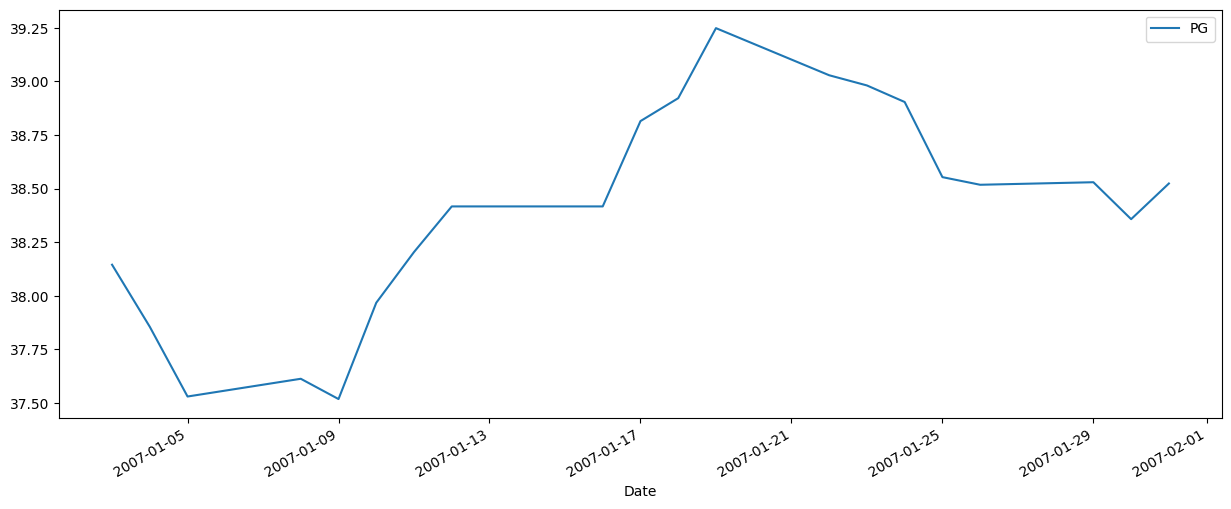

In [28]:
data.plot(figsize=(15, 6))

<Axes: xlabel='Date'>

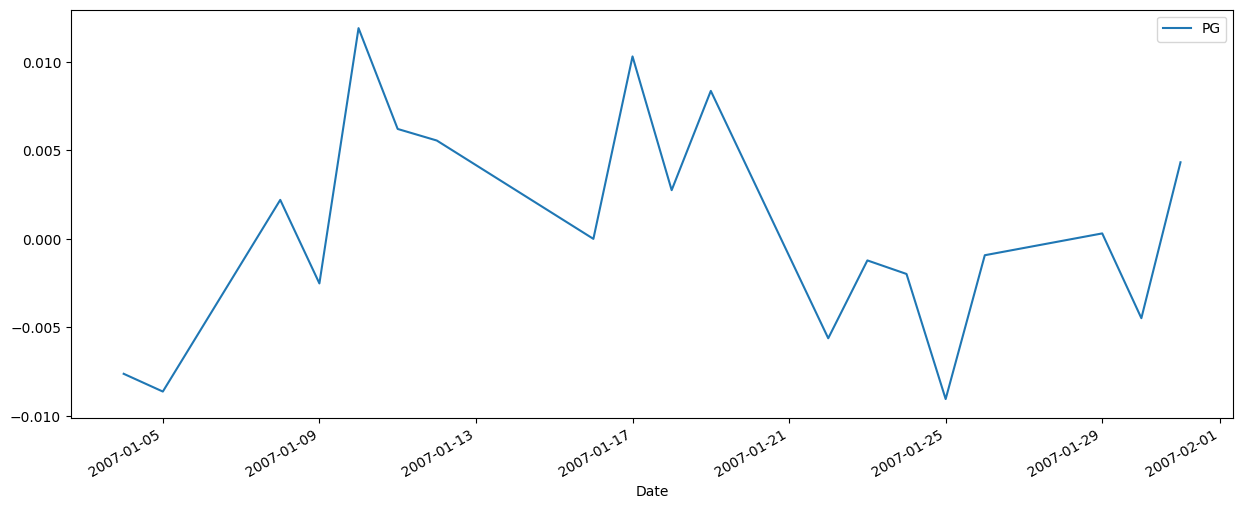

In [29]:
log_returns.plot(figsize=(15, 6))

In [30]:
mean = log_returns.mean()
mean

,0
PG,0.00052


In [31]:
variance = log_returns.var()
variance

,0
PG,0.000038


In [32]:
drift = mean - (0.5 * variance)
drift

,0
PG,0.000501


In [33]:
stdev = log_returns.std()
stdev

,0
PG,0.006199


In [34]:
type(drift) #showing that type is currently a series

pandas.core.series.Series

In [35]:
type(stdev)

pandas.core.series.Series

In [36]:
np.array(drift) #showing what a np array looks like

array([0.00050082])

In [37]:
drift.values # noticing that .values returns a np array as well

array([0.00050082])

In [38]:
stdev.values # likewise

array([0.00619859])

In [39]:
norm.ppf(0.95) # tells us the z score of a percentage like how 95% is 1.64 standard deviations away from the mean

np.float64(1.6448536269514722)

In [40]:
x = np.random.rand(10, 2) # showing how to create a random array of shape 10x2
x

array([[0.81617727, 0.86936555],
       [0.43279272, 0.9200199 ],
       [0.49361714, 0.54131791],
       [0.77032469, 0.75188924],
       [0.83114014, 0.97665679],
       [0.91249294, 0.81740712],
       [0.59659441, 0.75252613],
       [0.0098742 , 0.65905396],
       [0.77564449, 0.76886594],
       [0.57781982, 0.22402994]])

In [41]:
norm.ppf(x) # showing how to obtain z scores for each value in x

array([[ 0.90089254,  1.12339708],
       [-0.16926851,  1.40520544],
       [-0.01600013,  0.1037545 ],
       [ 0.73991656,  0.68044692],
       [ 0.95868053,  1.9891339 ],
       [ 1.35626737,  0.90552794],
       [ 0.24454187,  0.6824606 ],
       [-2.3310942 ,  0.4098826 ],
       [ 0.7575657 ,  0.73511719],
       [ 0.19631917, -0.75865346]])

In [42]:
z = norm.ppf(np.random.rand(10, 2))
z

array([[ 0.95091734, -0.22662856],
       [ 2.8381387 , -2.58836728],
       [-0.81118435,  0.00844748],
       [ 1.50237225,  0.56378622],
       [ 0.13253449,  0.37431814],
       [-0.07772859, -1.32540004],
       [-0.42894613, -1.0304376 ],
       [ 0.047223  , -0.03351079],
       [-0.46418223, -0.25671289],
       [-0.15539533,  0.73953369]])

In [43]:
t_intervals = 1000 # amount of days we're going to predict
iterations = 10 # amount of times to run the simulation, ie. get 10 sets of 1000 returns

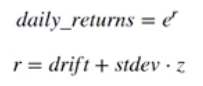

In [44]:
img = Image.open(PATH + 'assets/daily_returns.png')
display(img)

In [45]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations))) # exp() calculates e^(expression)
daily_returns # 10 sets of 1000 returns

array([[0.98993165, 1.00082684, 0.99424516, ..., 0.99300563, 0.99862398,
        1.00632566],
       [0.99204153, 0.99015685, 1.00835214, ..., 0.99438623, 0.99618116,
        0.99453553],
       [0.99830917, 1.00275609, 1.0001038 , ..., 0.99964675, 1.01042307,
        1.00304576],
       ...,
       [1.00561002, 0.99862634, 1.00250023, ..., 1.00141009, 0.99153844,
        0.99717403],
       [1.00668644, 1.00396867, 1.01295362, ..., 1.01124021, 1.00751215,
        0.99571092],
       [1.00531704, 1.00674149, 1.00526205, ..., 1.00770173, 0.99353504,
        1.00503924]])

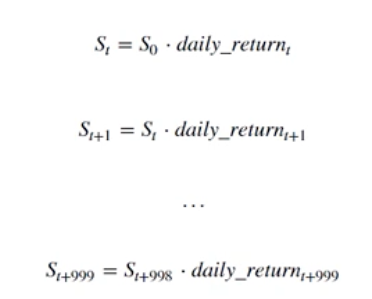

In [46]:
img = Image.open(PATH + 'assets/simulating_stock_prices.png')
display(img)

In [47]:
# The above image shows how to get the predicted price list
# Get the product of the previous day with the daily return calculated above
s0 = data.iloc[-1] # starting with the last value/most recent day's price
s0

,2007-01-31
PG,38.523327


In [48]:
price_list = np.zeros_like(daily_returns) # creates an array with a shape like the one passed to it, but filled with 0s
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
price_list[0] = s0
price_list

array([[38.52332687, 38.52332687, 38.52332687, ..., 38.52332687,
        38.52332687, 38.52332687],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [50]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list

array([[38.52332687, 38.52332687, 38.52332687, ..., 38.52332687,
        38.52332687, 38.52332687],
       [38.21674027, 38.14413583, 38.84507913, ..., 38.30706588,
        38.37621228, 38.31281722],
       [38.15212217, 38.24926453, 38.84911114, ..., 38.29353399,
        38.77621034, 38.42950894],
       ...,
       [52.05191273, 54.50032977, 66.58817275, ..., 57.67448077,
        68.02948595, 48.79060949],
       [52.39995481, 54.71662351, 67.45073037, ..., 58.32275391,
        68.54053398, 48.58134269],
       [52.67856755, 55.08549531, 67.80565958, ..., 58.77193972,
        68.09742205, 48.82615589]])

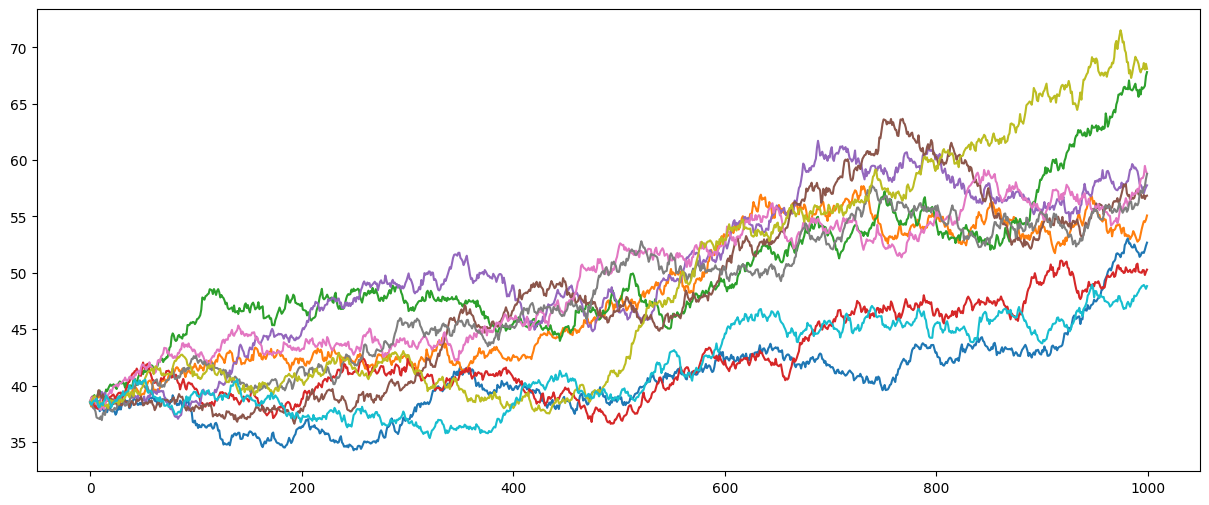

In [51]:
plt.figure(figsize=(15, 6))
plt.plot(price_list)

# An Intro to Derivatives
Derivatives are financial instruments whose price is derived from the development of one or more underlying assets. It is a contract involving at least two parties describing how they will exchange payments. Some derivatives trading is regulated through markets, while other 'over the counter' trading is unregulated. The regulated markets have a uniform contractual structure. Originally, derivatives served as a hedging instrument.

There are three groups of people that ustilize derivatives. Those that prefer:
- Hedging
- Speculating
- Arbitageurs (traders interested in finding discrepencies in things like price to take advantage of)

Four kinds of derivatives:
- Futures
    - Highly standardized forward contracts, typically stipulated in a marketplace (the difference is really the level of standardization and the participation of a clearning house)
- Swaps
    - Two parties agree to exchange cash flows based on an underlying asset at a future point in time
- Forwards
    - Two parties agree that one party will sell to the other an underlying asset at a future point of time (the price of the asset is agreed beforehand)
    - Imagine a corn farmer and a factory have an agreement: the farmer will plant corn today, but they'll lock in the price at the current price of corn, and then 3 months later, sell the corn to the factory
- Options
    - Enables its owner to buy or sell an underlying asset at a given price (strike price)
    - Option contracts can be exercised until a certain date
    - Call options (option to buy an asset) vs Put uptions (option to sell an asset)
    - European Options (Exercised at maturity) vs American Options (Exercised at any time)

### The Black Sholes formula
An important tool for derivatives pricing. It calculates the calue of a call by taking the difference between the amount you get if you exercise the option minus the amount you have to pay if you exercise the option

The framework:
- Efficient markets
- Transaction costs
- No dividend payments
- Known volatility and risk-free

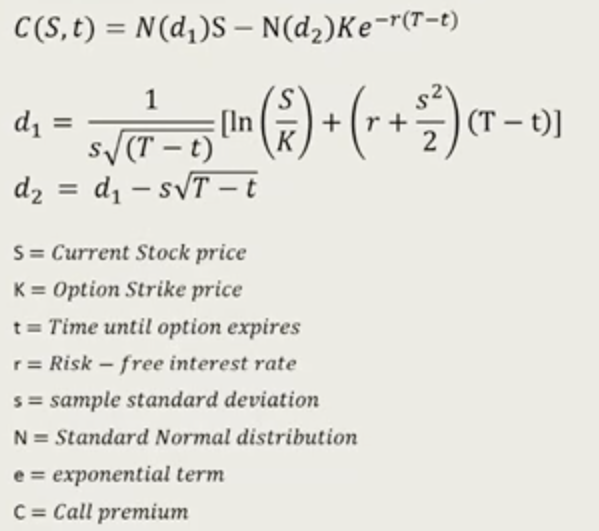

In [52]:
img = Image.open(PATH + 'assets/black_scholes_formula.png')
display(img)

d1 is how much we can expect if the option is exercised

d2 is the amount we must pay when exercising the option

In [53]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm

def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

In [54]:
norm.cdf(0) # cumulative distribution function: shows how the data accumulates in time
# So it takes in a value of std dist from the mean and returns the amount of data within it
# since data accumulates at a std dist (bell curve) .... i think??? lol

np.float64(0.5)

In [55]:
norm.cdf(0.25)

np.float64(0.5987063256829237)

In [56]:
def BSM(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [57]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = yf.download(ticker, start='2007-1-1', end='2017-3-22', auto_adjust=False)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [58]:
S = data.iloc[-1]
S

,2017-03-21
PG,73.108788


In [59]:
log_returns = np.log(1 + data.pct_change())
stdev = log_returns.std() * 250 ** 0.5
stdev

,0
PG,0.17655


In [60]:
r = 0.025
K = 93.0
T = 1

In [61]:
d1(S, K, r, stdev, T) # how much we can expect if the option is exercised

,0
PG,-1.133196


In [62]:
d2(S, K, r, stdev, T) # amount we must pay when exercising the option

,0
PG,-1.309746


In [63]:
BSM(S, K, r, stdev, T) # Predicted call option price

,2017-03-21
PG,0.769663


### Euler Discretization

In [64]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = yf.download(ticker, start='2007-1-1', end='2017-3-22', auto_adjust=False)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [66]:
log_returns = np.log(1 + data.pct_change())

In [68]:
r = 0.025

In [69]:
stdev = log_returns.std() * 250 ** 0.5
stdev

,0
PG,0.17655


In [70]:
stdev = stdev.values # convert series into np array
stdev

array([0.17655014])

In [72]:
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

In [73]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

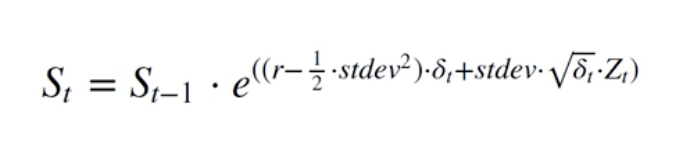

In [67]:
img = Image.open(PATH + 'assets/euler_discretization.png')
display(img)

In [74]:
for t in range(1, t_intervals + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [75]:
S

array([[73.10878754, 73.10878754, 73.10878754, ..., 73.10878754,
        73.10878754, 73.10878754],
       [72.92178266, 72.6804383 , 73.24243597, ..., 73.38360754,
        73.43381366, 73.43927383],
       [72.95961361, 72.41906025, 72.9548603 , ..., 75.199933  ,
        73.42206831, 74.32465508],
       ...,
       [71.8570896 , 79.97761409, 59.59594705, ..., 74.25607593,
        66.11857337, 78.22137519],
       [72.78326052, 79.76446962, 58.96801726, ..., 73.47868886,
        65.32499502, 77.80748867],
       [71.89689852, 79.80136902, 59.11144892, ..., 74.24169505,
        65.28906468, 78.36800071]])

In [77]:
S.shape

(251, 10000)

 ...]

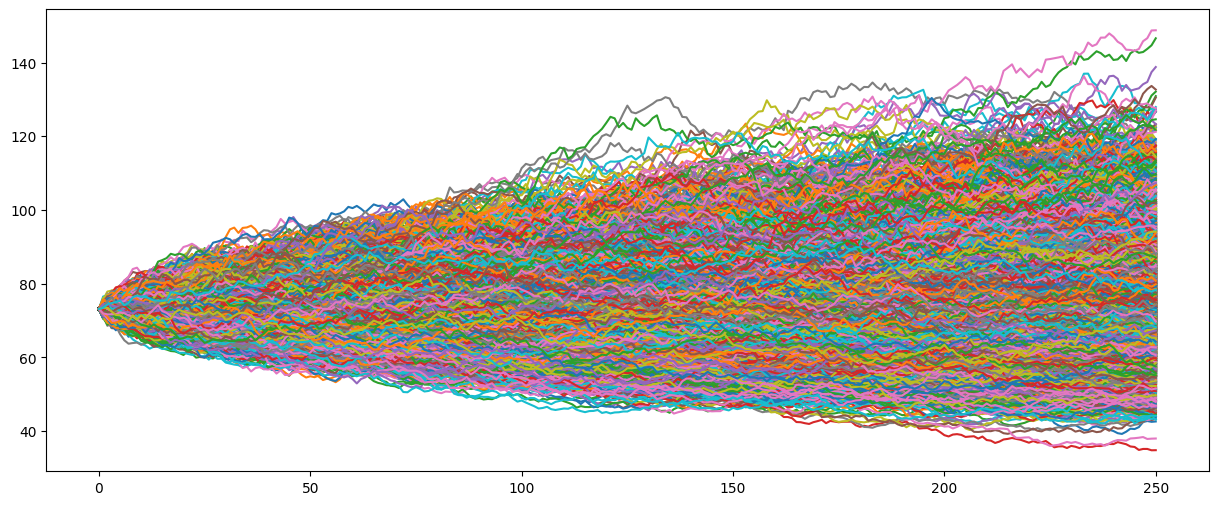

In [79]:
plt.figure(figsize=(15, 6))
plt.plot(S[:, :10]) # Only shows the last 10 simulations

Call option:
- Buy if: S - K > 0
- Don't buy if: S - K < 0

In [80]:
p = np.maximum(S[-1] - 110, 0) # creates an array that contains either S - 110 or 0 depending on which is higher (no negative values)
p # stands for payoff

array([0., 0., 0., ..., 0., 0., 0.])

In [81]:
p.shape

(10000,)

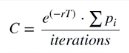

In [82]:
img = Image.open(PATH + 'assets/euler_discretized_monte_carlo.png')
display(img)

In [83]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

np.float64(0.0768762505787583)